In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# This makes plots prettier
import seaborn; seaborn.set()
%matplotlib inline

import datetime

In [4]:
df = pd.read_csv('data/H161.csv', parse_dates = ["utc_time"])
df["utc_time"] = df["utc_time"].dt.tz_localize(None)
df.set_index('utc_time', inplace=True)

/tmp/ipykernel_88545/2728985612.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/H161.csv', parse_dates = ["utc_time"])


In [5]:
df = df.drop(['73_H161.STATMENT'], axis=1)

In [6]:
df = df[df['73_H161.PHASE'].str.contains('DRYING') == True]

In [7]:
df.interpolate(method='ffill', columns=['GWI4802.PV', 'GTI4759.PV', 'GPI4452.PV'], inplace=True)

<AxesSubplot:xlabel='utc_time'>

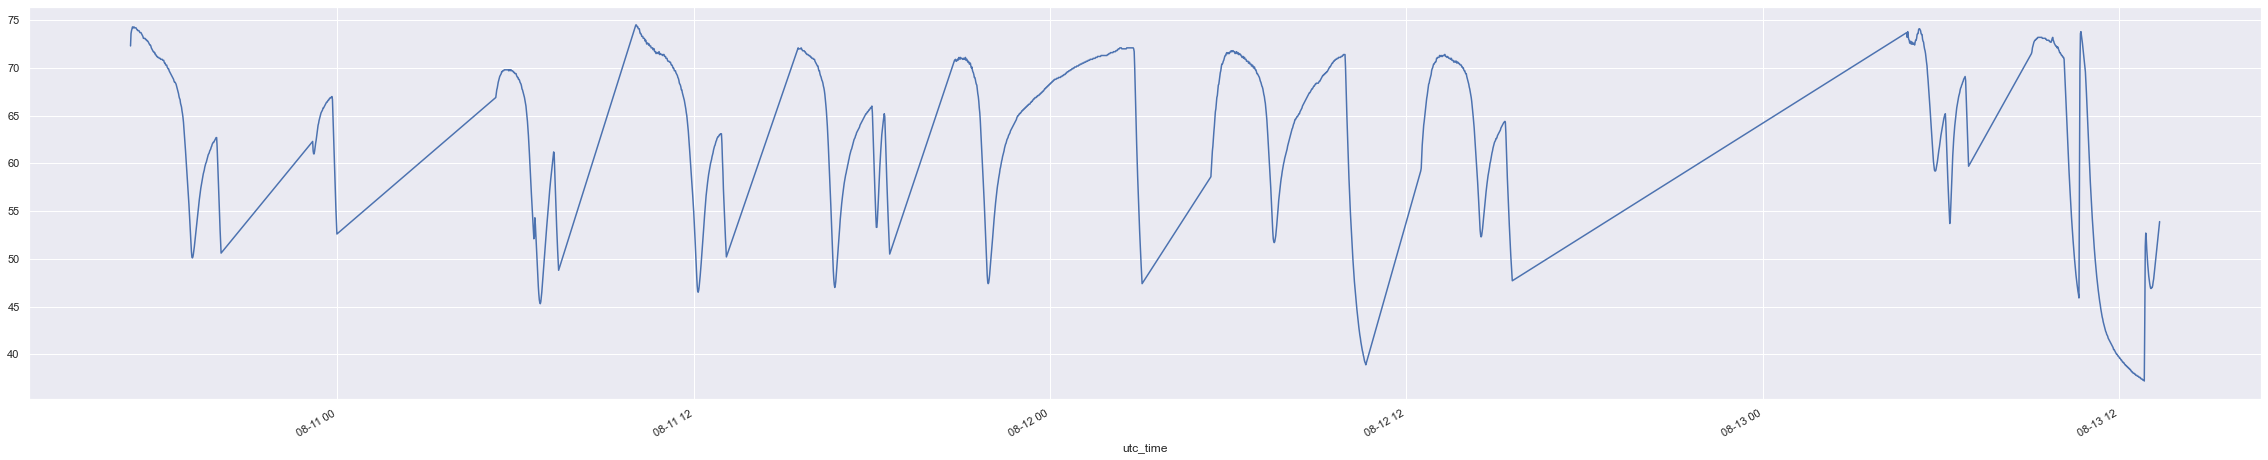

In [23]:
df['GTI4759.PV'].head(2000).plot(figsize=(40,8))

In [9]:
max = df.loc[df['73_H161.NN(33)'].idxmax()]

In [10]:
print(max)

73_H161.PHASE     DRYING
73_H161.STEP        LP01
73_H161.NN(33)     133.3
GWI4802.PV        3575.9
GTI4759.PV          52.8
GPI4452.PV         484.5
Name: 2021-08-10 19:14:14, dtype: object


In [11]:
def is_ready(row):
    if row['GTI4759.PV']>70 and row['73_H161.NN(33)'] > 25:
        return True
    else:
        return False


In [12]:
df['Ready'] = df.apply(lambda row: is_ready(row), axis=1)

In [13]:
df.head(500)

,73_H161.PHASE,73_H161.STEP,73_H161.NN(33),GWI4802.PV,GTI4759.PV,GPI4452.PV,Ready
utc_time,,,,,,,
2021-08-10 17:02:14,DRYING,LP01,1.9,3719.6,72.3,498.0,False
2021-08-10 17:03:14,DRYING,LP01,2.9,3720.0,73.6,503.9,False
2021-08-10 17:04:14,DRYING,LP01,3.9,3714.4,73.9,517.9,False
2021-08-10 17:05:14,DRYING,LP01,4.9,3714.5,74.1,523.5,False
2021-08-10 17:06:14,DRYING,LP01,5.9,3715.0,74.3,527.1,False
...,...,...,...,...,...,...,...
2021-08-11 12:14:14,DRYING,ENDDRY,45.2,3575.6,48.8,499.5,False
2021-08-11 12:15:14,DRYING,ENDDRY,12.0,3576.1,49.5,486.1,False
2021-08-11 12:16:14,DRYING,ENDDRY,0.0,3571.8,50.2,477.4,False
